# Ejercicios de CMB  
### Curso Intensivo: "Tópicos de cosmología observacional"

#### Profesora: Dra. Claudia Scóccola

Departamento de Física, FCFM, Universidad de Chile.


📅 **Fechas:**  del 25 de marzo al 4 de abril de 2025.
- **Primera semana:** martes, miércoles y jueves.  
- **Segunda semana:** todos los días, salvo el feriado del miércoles 2 de abril.  

⏰ **Horario:**  
- Clases teóricas: 9:30 - 11:00 y 11:30 - 13:00  
- Clase práctica: 14:30 - 16:00  

---

Este Jupyter Notebook está diseñado para analizar mapas del CMB, calcular estadísticas básicas y explorar el espectro angular de potencias utilizando datos reales y herramientas cosmológicas.

---


# CMB Analysis Notebook


## Primero vamos a bajar los datos. Por ejemplo, para bajar datos de Planck, hacemos:


### 1. Descargar datos de Planck

Los datos de Planck están disponibles en el Planck Legacy Archive (PLA):
🔗 https://pla.esac.esa.int/#maps
🔹 Descargar un mapa del CMB de Planck (2018, SMICA)

    Ir a https://pla.esac.esa.int/#maps.
    En Data Release, seleccionar 2018.
    En Map Type, elegir CMB maps.
    Bajar el archivo COM_CMB_IQU-smica_2048_R3.00_full.fits (mapa SMICA).
    Usar healpy.read_map('archivo.fits') para cargarlo en Python.

### 2. Descargar datos de WMAP

Los datos de WMAP están disponibles en el LAMBDA Archive de la NASA:
🔗 https://lambda.gsfc.nasa.gov/product/map/current/
🔹 Descargar un mapa del CMB de WMAP

    Ir a https://lambda.gsfc.nasa.gov/product/map/dr5/skymaps_get.html.
    Descargar el archivo wmap_band_iqumap_r9_9yr_K.fits (para la frecuencia K).
    Cargarlo con healpy.read_map('archivo.fits').


Una vez descargado, guardarlo en el directorio de trabajo y usar las funciones de análisis.

Diferencia entre SMICA y SMICA NoSZ:
- SMICA estándar: Contiene el efecto Sunyaev-Zel'dovich (SZ), útil si quieres analizar todas las componentes.
- SMICA NoSZ: Se ha eliminado la contribución del efecto SZ, ideal para estudiar anisotropías primordiales del CMB sin contaminación de cúmulos de galaxias.

---


## Importamos las librerías relevantes


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import camb
from camb import model, initialpower

import CMB_utils
import importlib


### Cargamos el mapa

In [10]:
# archivo donde está el mapa:
planck_map = "data/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits" 

# Cargar el mapa de Planck
cmb_map = hp.read_map(planck_map)

### Despliegue del mapa

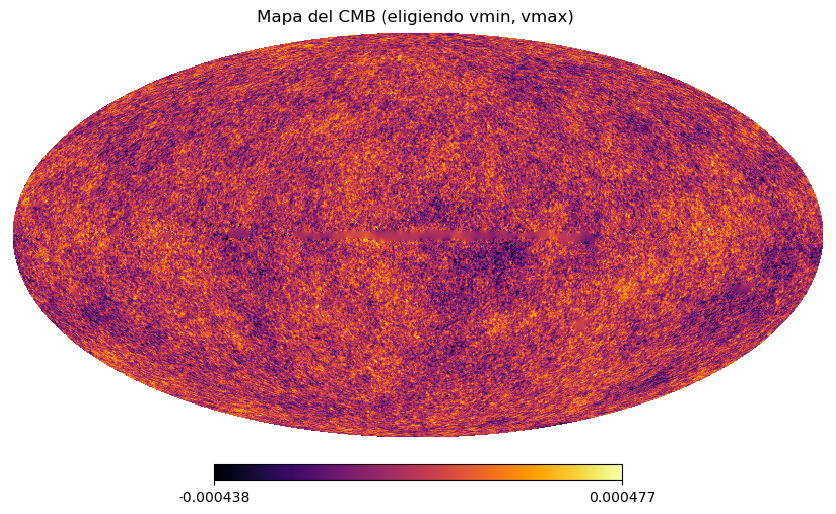

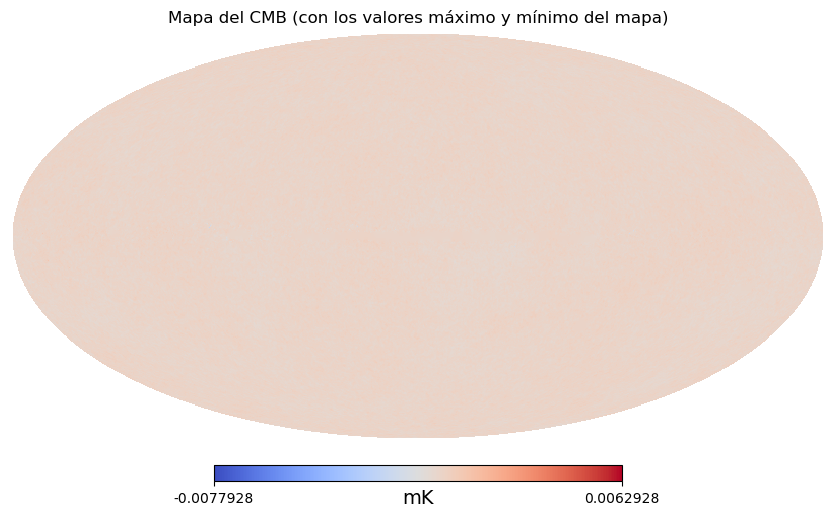

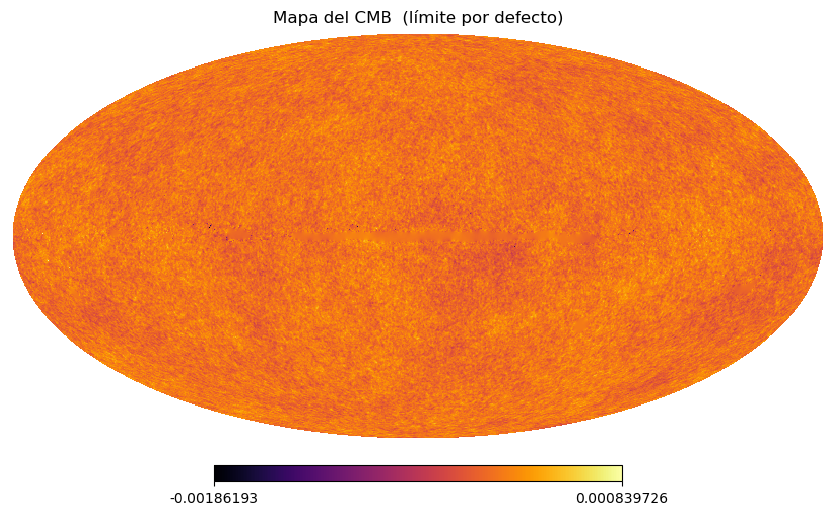

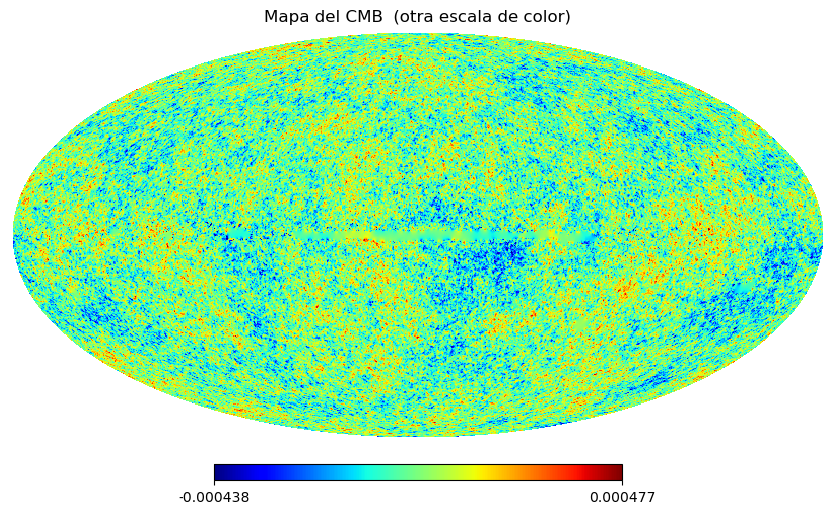

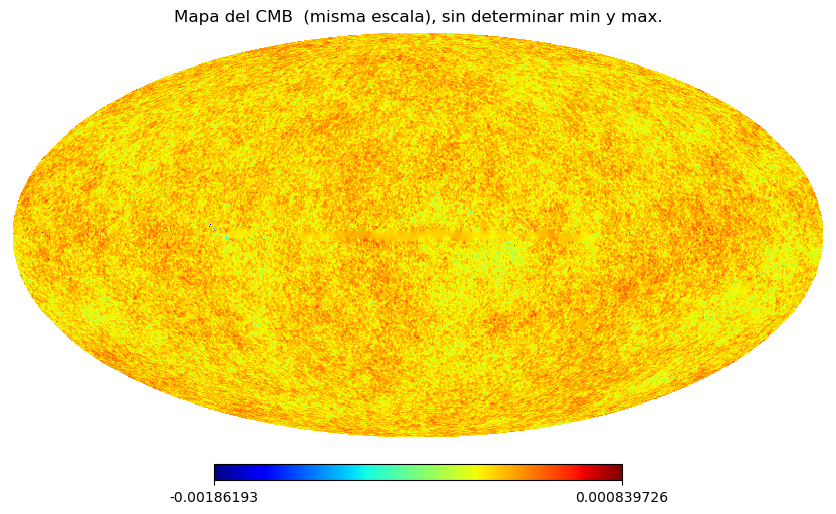

In [42]:
# Hacer un display del mapa con distintos valores de vmax, vmin (cortes), probar con los valores máximo y mínimo del mapa,
# y con los valore por defecto. Por qué se ve distinto? A que se deben las diferencias? Que podemos aprender de este ejercicio?
# Probar distintas escalas de color, y discutir cual resulta más conveniente y por qué.

vmax= 0.000477
vmin= -0.000438


# Visualizar el mapa
#hp.mollview(cmb_map, title="Mapa del CMB - Planck 2018 SMICA - no SZ", cmap="plasma", min=np.min(cmb_map), max=0)

hp.mollview(cmb_map, title="Mapa del CMB (eligiendo vmin, vmax) ", cmap="inferno", min= vmin, max= vmax)

hp.mollview(cmb_map, title='Mapa del CMB (con los valores máximo y mínimo del mapa)', unit='mK', cmap='coolwarm',min=np.min(cmb_map), max=np.max(cmb_map) )

hp.mollview(cmb_map, title="Mapa del CMB  (límite por defecto)", cmap="inferno")

hp.mollview(cmb_map, title="Mapa del CMB  (otra escala de color)", cmap="jet", min= vmin, max= vmax)

hp.mollview(cmb_map, title="Mapa del CMB  (misma escala), sin determinar min y max.", cmap="jet")



In [25]:
importlib.reload(CMB_utils)

<module 'CMB_utils' from '/home/claudia-scoccola/Dropbox/CLAUDIA/TRABAJO/DOCENCIA/curso_intensivo_Cosmologia/CMB/CMB_utils.py'>

In [30]:
# chequear la temperatura media del mapa:

CMB_utils.check_mean_temperature(cmb_map)

Temperatura media del mapa: -0.00000 mK


-5.133671e-13

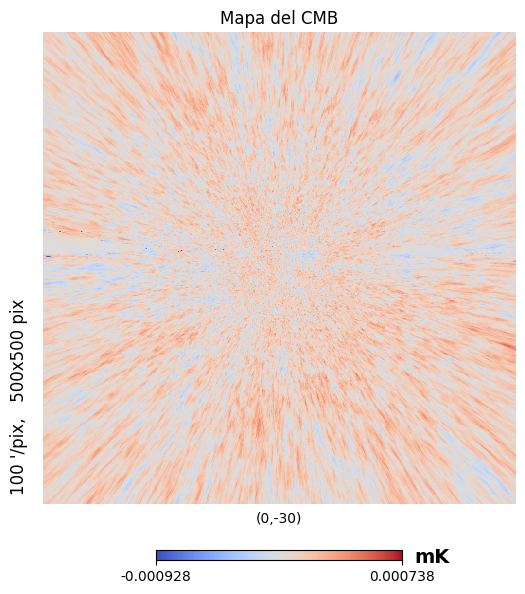

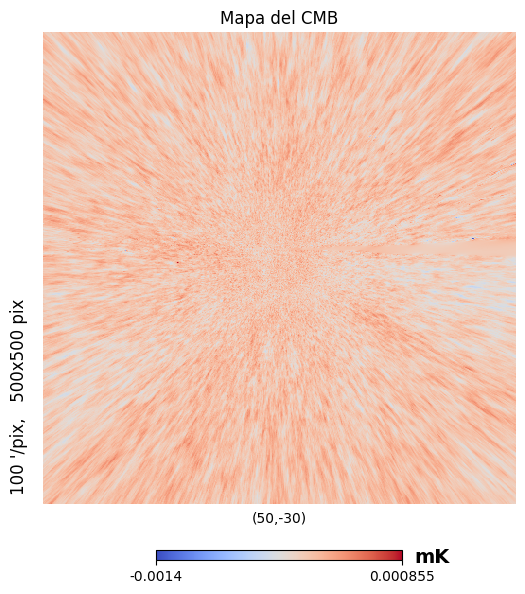

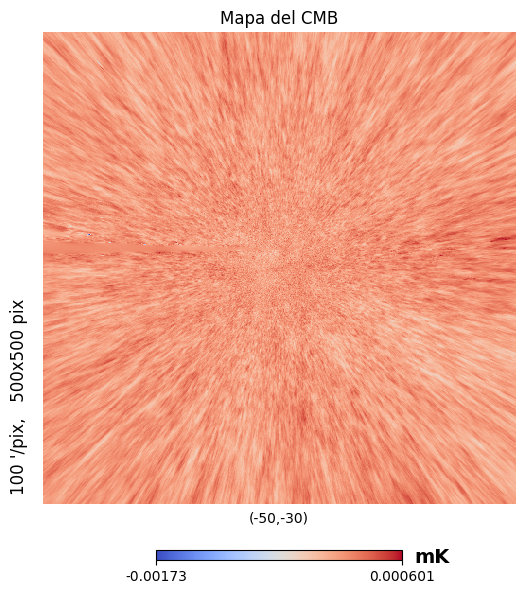

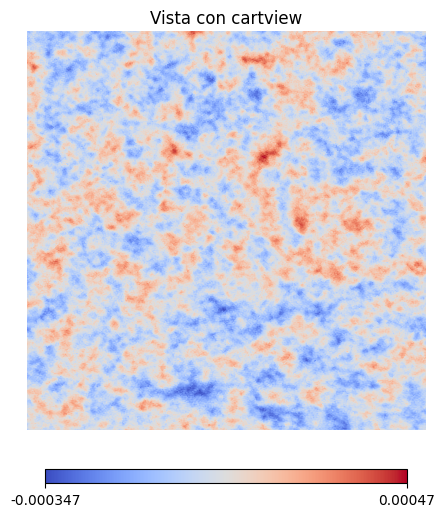

In [45]:
vmax = np.max(np.abs(cmb_map))  # Máximo valor absoluto
vmin = -vmax  # Hacer que el mínimo sea -vmax para una escala simétrica



# Centro de la proyección (coordenadas en grados)
lon_center = 50 #0  # Longitud central
lat_center = -30  # Latitud central

# Tamaño del campo de visión (en grados)
reso = 100  # Tamaño de la ventana

# Mostrar la región específica del cielo
#hp.gnomview(cmb_map, rot=(lon_center, lat_center), xsize=500, reso=reso, title="Vista parcial del cielo")


#hp.gnomview(cmb_map, rot=(lon_center, lat_center), xsize=500, reso=reso, title='Mapa del CMB', unit='mK', cmap='coolwarm',min=np.min(cmb_map), max=np.max(cmb_map) )

hp.gnomview(cmb_map, rot=(0, lat_center), xsize=500, reso=reso, title='Mapa del CMB', unit='mK', cmap='coolwarm' )
hp.gnomview(cmb_map, rot=(50, lat_center), xsize=500, reso=reso, title='Mapa del CMB', unit='mK', cmap='coolwarm' )

hp.gnomview(cmb_map, rot=(-50, lat_center), xsize=500, reso=reso, title='Mapa del CMB', unit='mK', cmap='coolwarm' )

hp.cartview(cmb_map, lonra=[lon_center - 10, lon_center + 10], latra=[lat_center - 10, lat_center + 10],
            cmap='coolwarm',  title="Vista con cartview")


#hp.gnomview(cmb_map, rot=(lon_center, lat_center), xsize=500, reso=reso, cmap='coolwarm', min=vmin, max=vmax, title="Vista parcial del cielo con coolwarm")

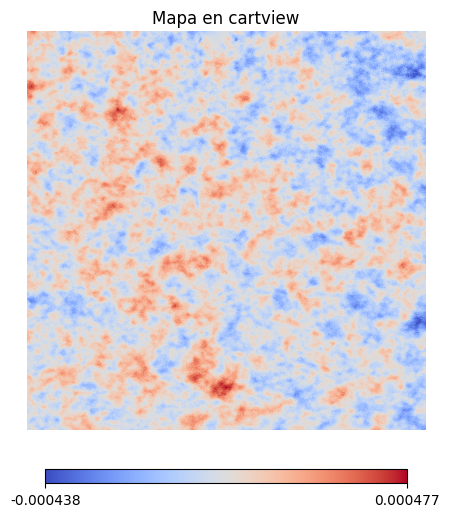

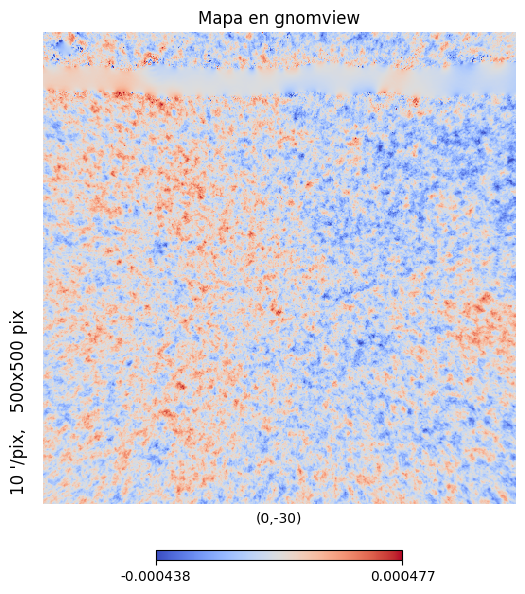

In [51]:

# Parámetros comunes
lon_min, lon_max = -10, 10
lat_min, lat_max = -40, -20
#vmax = np.max(cmb_map)
#vmin = np.min(cmb_map)

vmax= 0.000477
vmin= -0.000438

# Graficar con cartview
hp.cartview(cmb_map, lonra=[lon_min, lon_max], latra=[lat_min, lat_max], 
            cmap='coolwarm', min=vmin, max=vmax, title="Mapa en cartview")
#hp.cartview(cmb_map, lonra=[lon_min, lon_max], latra=[lat_min, lat_max], cmap='coolwarm', title="Mapa en cartview")


# Parámetros comunes
lon_center, lat_center = 0, -30  # Centro de la proyección
xsize = 500  # Tamaño de la imagen en píxeles
reso = 10     # Resolución angular en minutos de arco

# Graficar con gnomview
hp.gnomview(cmb_map, rot=(lon_center, lat_center), xsize=xsize, reso=reso, 
            cmap='coolwarm', min=vmin, max=vmax, title="Mapa en gnomview")
#hp.gnomview(cmb_map, rot=(lon_center, lat_center), xsize=xsize, reso=reso, cmap='coolwarm', title="Mapa en gnomview")


In [43]:
nside = hp.get_nside(cmb_map)

print("nside: ",nside)

# Definir una máscara para seleccionar solo la región mostrada en gnomview
vec = hp.ang2vec(lon_center, lat_center, lonlat=True)
radius_rad = np.radians(reso)  # Convertir tamaño de la ventana a radianes
indices = hp.query_disc(nside, vec, radius_rad)

# Calcular la media y la fracción de valores positivos en la región
region_values = cmb_map[indices]
media = np.mean(region_values)
fraccion_positivos = np.sum(region_values > 0) / len(region_values)

print(f"Media en la región: {media:.3f}")
print(f"Fracción de valores positivos: {fraccion_positivos:.2%}")


nside:  2048
Media en la región: -0.000
Fracción de valores positivos: 49.99%


In [30]:
print(vmax,vmin)

0.0077928016 -0.0077928016


In [17]:

# Guardar los valores mínimos y máximos del mapa original
vmin, vmax = np.min(cmb_map), np.max(cmb_map)

vmin, vmax

(-0.0077928016, 0.006292796)

/tmp/ipykernel_5078/3938529985.py:5: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(fits_file, verbose=False)


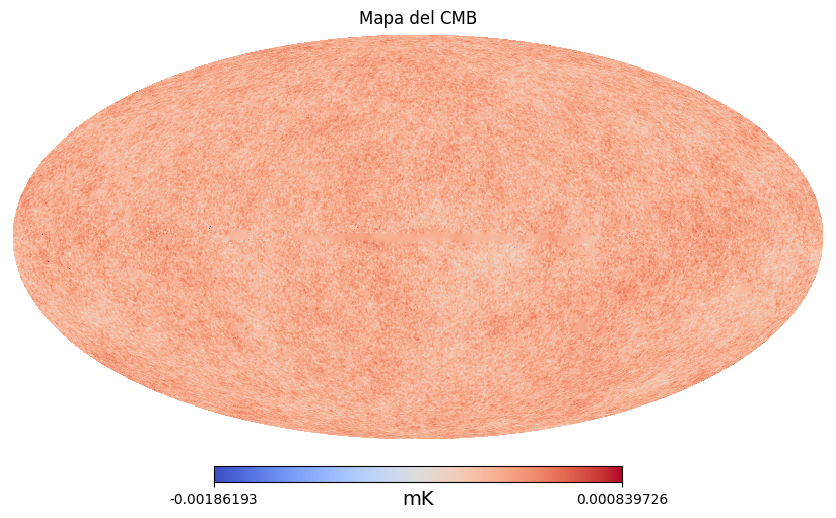

In [7]:
plot_cmb_map(planck_map)


In [7]:
plot_cmb_map('archivo.fits')

/tmp/ipykernel_7332/3938529985.py:5: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(fits_file, verbose=False)


FileNotFoundError: [Errno 2] No such file or directory: 'archivo.fits'

/tmp/ipykernel_5078/3938529985.py:5: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(fits_file, verbose=False)


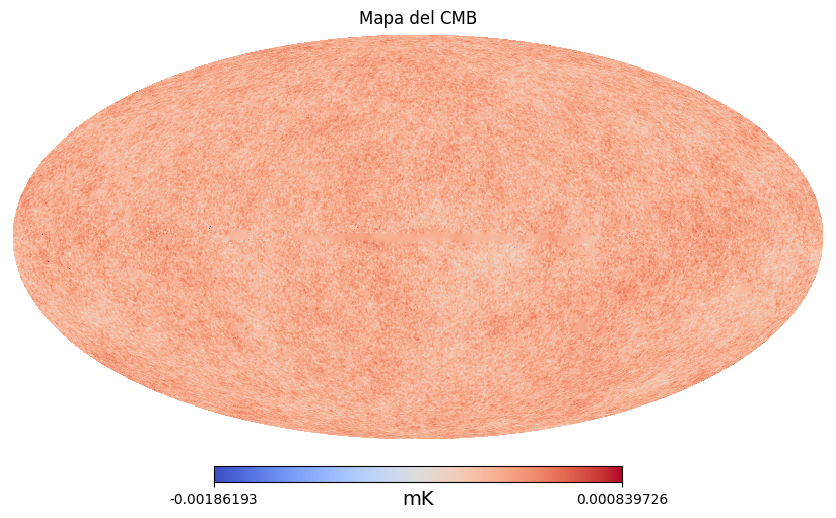

Temperatura media: -0.00000 mK
Desviación estándar: 0.00011 mK


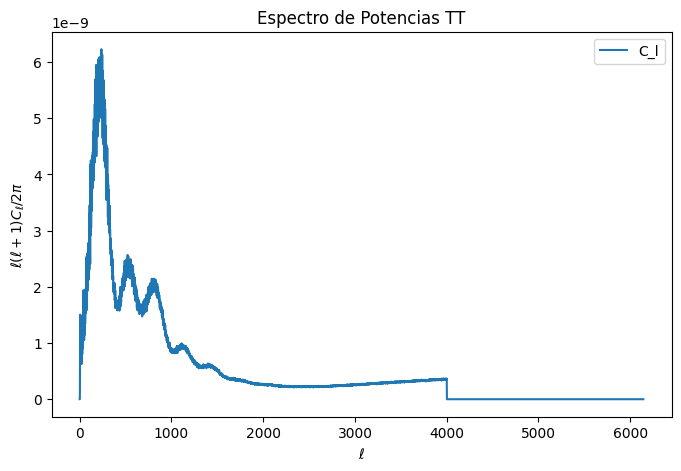

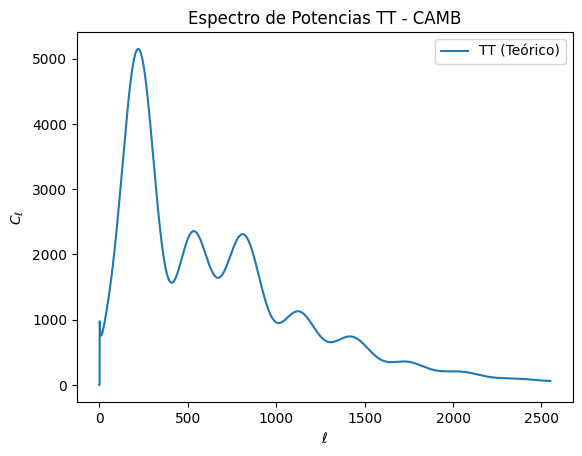

In [62]:
planck_map = "data/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits" 


# Para usar las funciones, basta con llamar:
plot_cmb_map(planck_map)
analyze_cmb_statistics(planck_map)
compute_power_spectrum(planck_map)
generate_camb_spectrum()

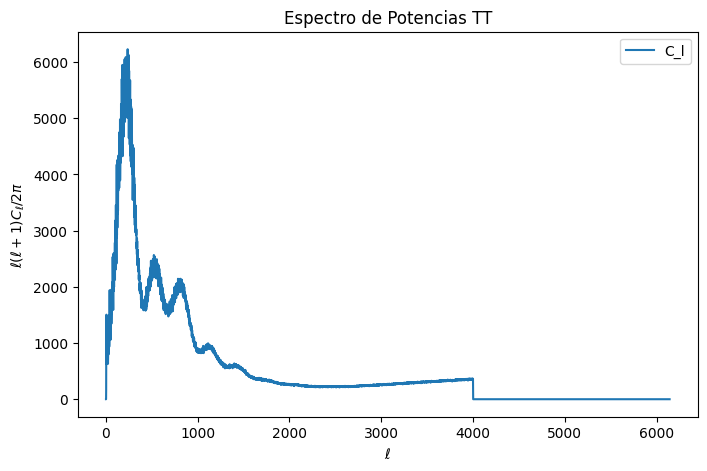

In [64]:
# Si el mapa de Planck está en K y lo necesitas en micro-Kelvins (muK):
mapa_planck_muK = cmb_map * 1e6  # Convertir de K a microKelvin (muK)

   
cl = hp.anafast(mapa_planck_muK)
ell = np.arange(len(cl))
plt.figure(figsize=(8, 5))
plt.plot(ell, cl * ell * (ell + 1) / (2 * np.pi), label='C_l')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell / 2\pi$')
plt.title('Espectro de Potencias TT')
plt.legend()
 

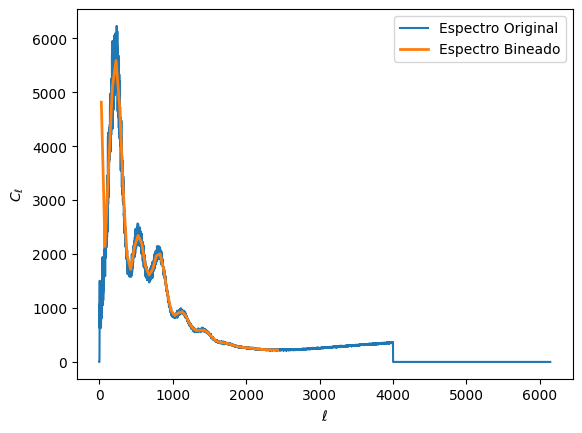

In [73]:


# Suponiendo que tienes el espectro de potencias 'ell' y 'C_ell' ya calculados:
# ell = np.arange(2, 2500)  # Rango de valores de ell
# C_ell = np.random.rand(2499) * 1e-10  # Espectro de potencias ejemplo

# cl = hp.anafast(mapa_planck_muK)

C_ell = cl

# Definir los límites de los bins (por ejemplo, agrupando en intervalos de 50)
bin_width = 50
bins = np.arange(2, 2500, bin_width)

# Calcular el índice de los bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
binned_spectrum = []

for i in range(len(bins)-1):
    # Obtener los índices de los valores de ell dentro del bin
    bin_mask = (ell >= bins[i]) & (ell < bins[i+1])
    
    # Promediar los valores de C_ell dentro de cada bin
    binned_spectrum.append(np.mean(C_ell[bin_mask]))

# Convertir la lista a un array
binned_spectrum = np.array(binned_spectrum)

# Graficar el espectro original y el binned
plt.plot(ell, C_ell * ell * (ell + 1) / (2 * np.pi) , label='Espectro Original')
plt.plot(bin_centers, binned_spectrum * bin_centers * (bin_centers + 1) / (2 * np.pi) , label='Espectro Bineado', linewidth=2)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.legend()
plt.show()


[[2.00000e+00 1.01673e+03 2.61753e+00 3.08827e-02 1.81847e-06 5.01352e-08]
 [3.00000e+00 9.63727e+02 2.93806e+00 3.96903e-02 3.63743e-06 6.09943e-08]
 [4.00000e+00 9.12608e+02 2.75866e+00 3.44962e-02 6.06345e-06 7.02592e-08]
 [5.00000e+00 8.74477e+02 2.35185e+00 2.30941e-02 9.09717e-06 7.82921e-08]
 [6.00000e+00 8.48509e+02 1.89605e+00 1.29512e-02 1.27394e-05 8.53020e-08]]


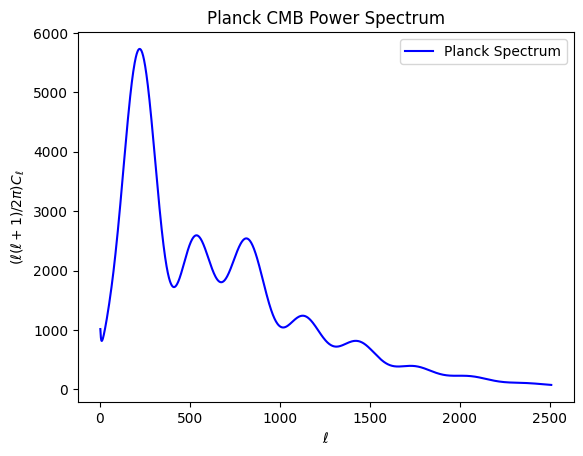

In [67]:
# Cargar el archivo .txt (ajusta el path al archivo real)
file_path = "data/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt"

# Leer el archivo
# Suponiendo que el archivo tiene columnas: ell, C_ell (ajustar según el formato del archivo)
data = np.loadtxt(file_path)

# Mostrar las primeras filas para ver el formato del archivo
print(data[:5])

# Extraer las columnas
ell_planck = data[:, 0]  # Primer columna: multipolos (ell)
Cl_planck = data[:, 1]   # Segunda columna: C_l para TT (ajustar según el archivo)

# Graficar el espectro de Planck
plt.plot(ell_planck, Cl_planck, label='Planck Spectrum', color='blue')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$(\ell (\ell + 1) / 2\pi) C_\ell$')
plt.title('Planck CMB Power Spectrum')
plt.legend()



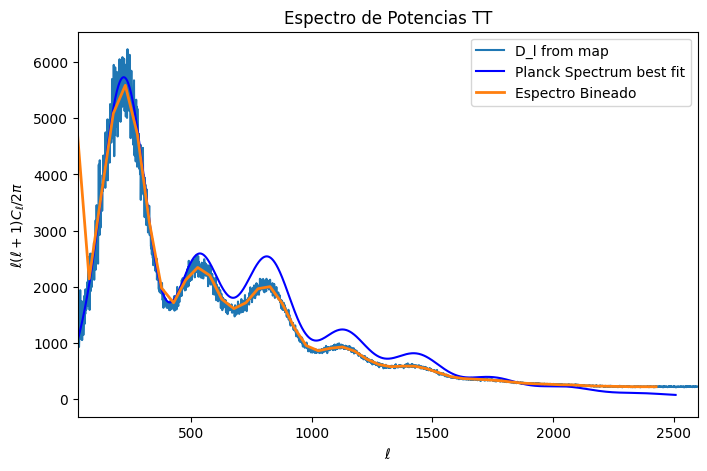

In [75]:
# ahora grafico en el mismo plot, el best fit, y el que sale del anafast:


plt.figure(figsize=(8, 5))
plt.plot(ell, cl * ell * (ell + 1) / (2 * np.pi), label='D_l from map')

plt.plot(ell_planck, Cl_planck, label='Planck Spectrum best fit', color='blue')

plt.plot(bin_centers, binned_spectrum * bin_centers * (bin_centers + 1) / (2 * np.pi) , label='Espectro Bineado', linewidth=2)

# Limitar el eje x
plt.xlim(30, 2600)  # Establecer límites del eje x entre 30 y 2000

plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell / 2\pi$')
plt.title('Espectro de Potencias TT')
plt.legend()



In [79]:

# Parámetros
theta_FWHM_arcmin = 5  # All CMB products are provided at an approximate angular resolution of 5 arcmin FWHM, 
                       # and HEALPix resolution Nside=2048. Explicit effective beam profiles are provided 
                       # for each foreground reduced CMB map. 

        
theta_FWHM = theta_FWHM_arcmin  * np.pi / (180 * 60)  # FWHM en radianes, ejemplo: 10' en radianes

# Cálculo de B_l para un valor de l

# Fórmula del beam gaussiano B_l
B_l = np.exp(- (ell * (ell + 1) * theta_FWHM**2) / (8 * np.log(2)))


# Si tienes el espectro C_l, la corrección sería

cl_corr = cl / B_l**2  # Aquí C_l es el espectro original


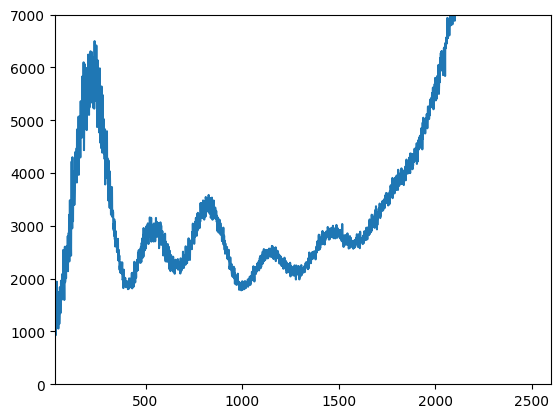

In [100]:

plt.clf

plt.xlim(30, 2600)  # Establecer límites del eje x entre 30 y 2000

plt.ylim(0, 7000)  # Establecer límites del eje x entre 30 y 2000

plt.plot(ell, cl_corr  * ell * (ell + 1) / (2 * np.pi), label='espectro corregido por el beam')

#plt.plot(ell, B_l)

#plt.plot(ell, cl* ell * (ell + 1) / (2 * np.pi))


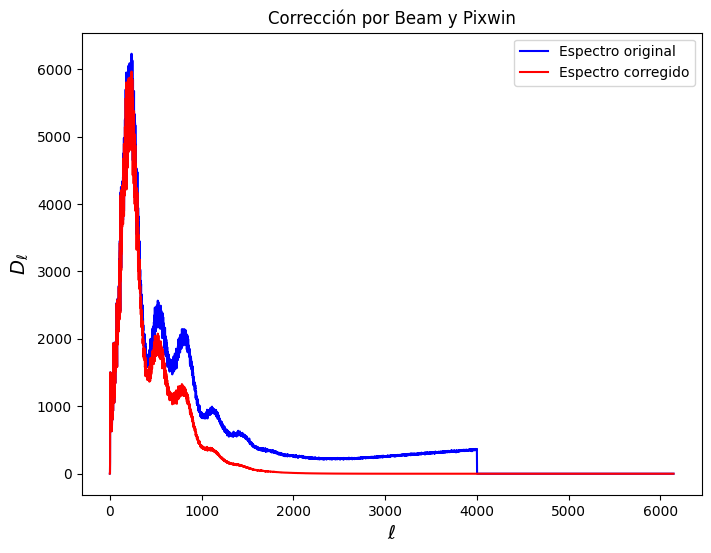

In [105]:

# Definir el valor de nside (resolución del mapa)
nside = 2048  # Ajusta esto según tu mapa

# Definir el valor del FWHM en arcmin
fwhm_arcmin = 5  # Ejemplo: 5 arcmin
fwhm_rad = fwhm_arcmin * np.pi / (180 * 60)  # Convertir de arcmin a radianes


# Calcular la función de la ventana de los píxeles (pixwin) para un mapa con 'nside'
pixwin = hp.pixwin(nside)

# Función para corregir por el beam (usando el FWHM)
def beam_correction(l, fwhm_rad):
    """Devuelve la corrección por el beam (Gaussiana)"""
    return np.exp(-l * (l + 1) * fwhm_rad**2 / 8.0 / np.log(2))

# Calculamos el espectro de potencia corregido por el beam y la pixwin
def correct_spectrum(l, dl, fwhm_rad, pixwin):
    """Corrige el espectro de potencia por el beam y la pixwin"""
    beam_factor = beam_correction(l, fwhm_rad)
    return  dl * beam_factor**2 * pixwin


#D_l
dl =  cl * ell * (ell + 1) / (2 * np.pi)


# Corregir el espectro por el beam y pixwin
dl_corrected = correct_spectrum(ell, dl, fwhm_rad, pixwin)

# Graficar el espectro corregido
plt.figure(figsize=(8, 6))
plt.plot(ell, dl, label="Espectro original", color='blue')
plt.plot(ell, dl_corrected, label="Espectro corregido", color='red')
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$D_\ell$', fontsize=14)
plt.legend()
plt.title("Corrección por Beam y Pixwin")
plt.show()


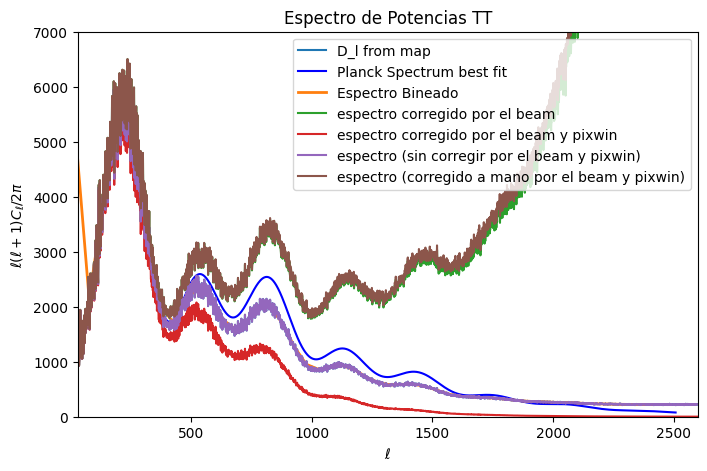

In [112]:
# ahora grafico en el mismo plot, el best fit, y el que sale del anafast:


plt.figure(figsize=(8, 5))
plt.plot(ell, cl * ell * (ell + 1) / (2 * np.pi), label='D_l from map')

plt.plot(ell_planck, Cl_planck, label='Planck Spectrum best fit', color='blue')

plt.plot(bin_centers, binned_spectrum * bin_centers * (bin_centers + 1) / (2 * np.pi) , label='Espectro Bineado', linewidth=2)


plt.plot(ell, cl_corr  * ell * (ell + 1) / (2 * np.pi), label='espectro corregido por el beam')


plt.plot(ell, dl_corrected , label='espectro corregido por el beam y pixwin')

plt.plot(ell, dl , label='espectro (sin corregir por el beam y pixwin)')

plt.plot(ell, dl / B_l**2 /pixwin , label='espectro (corregido a mano por el beam y pixwin)')


# Limitar el eje x, y
plt.xlim(30, 2600) 
plt.ylim(0, 7000) 

plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell / 2\pi$')
plt.title('Espectro de Potencias TT')
plt.legend()



In [69]:
# Para usar las funciones, basta con llamar:
# plot_cmb_map('archivo.fits')
# analyze_cmb_statistics('archivo.fits')
# compute_power_spectrum('archivo.fits')
# generate_camb_spectrum()

In [63]:
from astropy.io import fits

# Cargar el archivo .fits
#planck_map = "data/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits" 
file_path =  "data/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits"

#file_path = "path_to_your_file.fits"
hdul = fits.open(file_path)

# Ver todos los encabezados
hdul.info()

# Ver las primeras 10 líneas del encabezado del primer HDU (Header Data Unit)
header = hdul[0].header
for key, value in list(header.items())[:10]:
    print(f"{key}: {value}")
    
# Si quieres ver específicamente las unidades de los datos
# Por lo general, los datos están en el primer HDU, pero puede variar.
data = hdul[0].data


Filename: data/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1                1 BinTableHDU     35   50331648R x 2C   [1E, 1E]   
SIMPLE: True
BITPIX: 32
NAXIS: 0
EXTEND: True
COMMENT:   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT:   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
DATE: 2018-04-21T07:27:35
